<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/Nhandangchitay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/train4',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 189 images belonging to 6 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/validation4',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 41 images belonging to 6 classes.


In [ ]:
training_data.class_indices

{'Bacsy': 0,
 'Congnhan': 1,
 'Kysu': 2,
 'Luatsu': 3,
 'Nhanvienbanhang': 4,
 'Typhu': 5}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128  lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))





model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_95 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_97 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=50,batch_size=150,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
6/6 [==============================] - 95s 1s/step - loss: 2.5062 - accuracy: 0.2116 - val_loss: 1.8317 - val_accuracy: 0.2195
Epoch 2/50
6/6 [==============================] - 4s 700ms/step - loss: 1.7956 - accuracy: 0.2063 - val_loss: 1.7658 - val_accuracy: 0.1951
Epoch 3/50
6/6 [==============================] - 5s 764ms/step - loss: 1.7316 - accuracy: 0.2169 - val_loss: 1.6827 - val_accuracy: 0.1707
Epoch 4/50
6/6 [==============================] - 5s 829ms/step - loss: 1.6035 - accuracy: 0.2857 - val_loss: 1.7392 - val_accuracy: 0.2927
Epoch 5/50
6/6 [==============================] - 4s 715ms/step - loss: 1.6485 - accuracy: 0.4127 - val_loss: 2.3130 - val_accuracy: 0.2195
Epoch 6/50
6/6 [==============================] - 5s 857ms/step - loss: 1.8128 - accuracy: 0.3069 - val_loss: 1.7885 - val_accuracy: 0.1463
Epoch 7/50
6/6 [==============================] - 5s 787ms/step - loss: 1.7190 - accuracy: 0.2963 - val_loss: 1.6896 - val_accuracy: 0.3171
Epoch 8/50
6/6 [======

<function matplotlib.pyplot.show(close=None, block=None)>

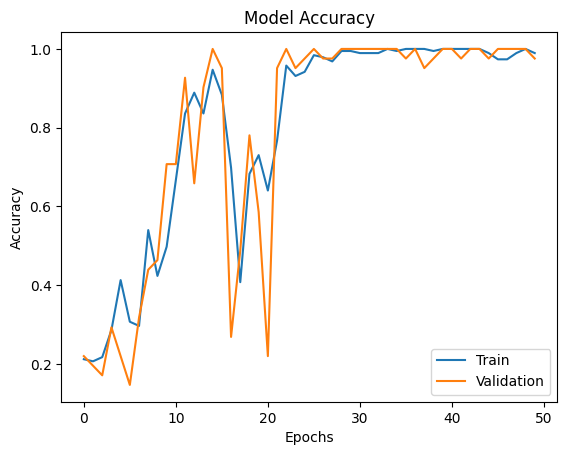

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Dudoanchitay.h5")

In [ ]:
model_nhandien=load_model('Dudoanchitay.h5')

1/1 [==============================] - 0s 91ms/step
Bacsy


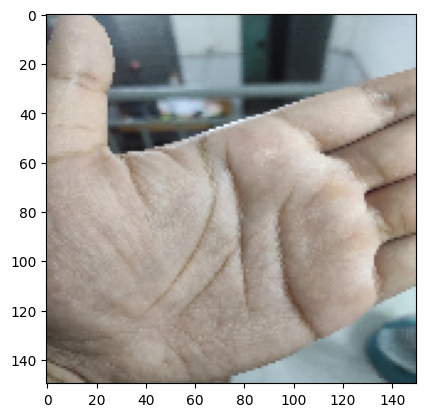

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Bacsy.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)

1/1 [==============================] - 0s 21ms/step
Congnhan


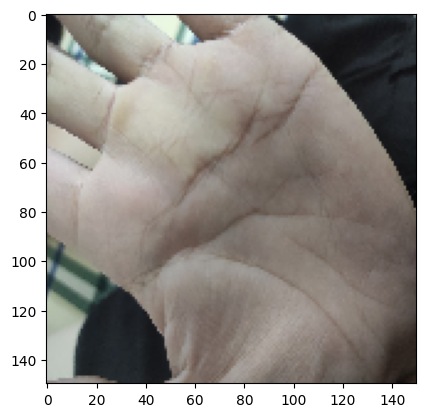

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Congnhan.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)

1/1 [==============================] - 0s 20ms/step
Kysu


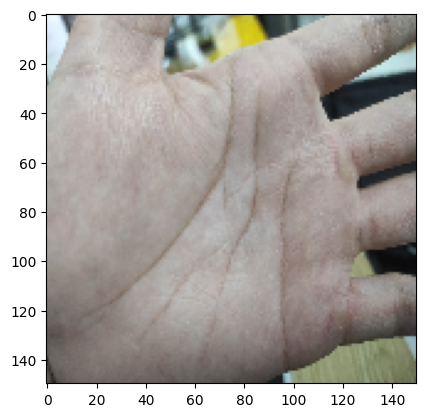

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Kysu.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)

1/1 [==============================] - 0s 22ms/step
Luatsu


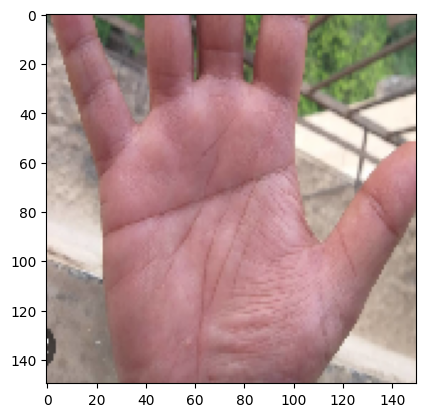

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Luatsu.png",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)

1/1 [==============================] - 0s 20ms/step
Nhanvienbanhang


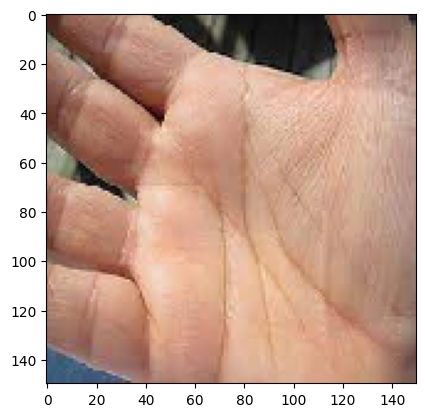

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Nhanvienbanhang.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)

1/1 [==============================] - 0s 34ms/step
Typhu


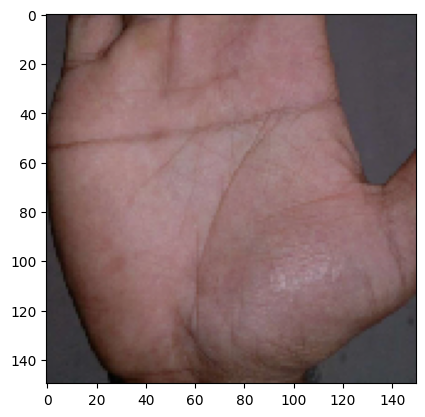

In [ ]:
img=load_img("/content/drive/MyDrive/test4/Typhu.png",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='Bacsy'
if round(result[0][1])==1:
  prediction='Congnhan'
if round(result[0][2])==1:
  prediction='Kysu'
if round(result[0][3])==1:
  prediction='Luatsu'
if round(result[0][4])==1:
  prediction='Nhanvienbanhang'
if round(result[0][5])==1:
  prediction='Typhu'
print(prediction)